In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.0 MB/s eta 0:00:00


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 69.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.1-py3-none-any.whl size=25313921 sha256

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/train.csv')

In [6]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,rt _hockey: it’s gold gbr rio2016 hockey @_gbh…,0.000,0.000,Neutral
1,1,amazing! congratulations winning modernpentath...,0.825,0.625,Positive
2,2,wait. ashton eaton won decathlon gold again? yas!,0.000,0.000,Neutral
3,3,got shivers watching end chloe esposito's race...,0.000,0.000,Neutral
4,4,celebrating gold! effort! congratulations! 👍💪🏅,0.000,0.000,Neutral


In [7]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/test.csv')

In [8]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,75000,add bitcoins goldira investingold buyinggold j...,0.0,0.0,Neutral
1,75001,"focus sports, goldira investingold buyinggold ...",0.0,0.0,Neutral
2,75002,'we're dreading going home goldira investingol...,0.0,0.0,Neutral
3,75003,cast silver bar ira rrsp acceptable. goldira i...,0.0,0.0,Neutral
4,75004,monetary works goldira investingold buyinggold...,0.0,0.0,Neutral


In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [10]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [11]:
len(X_train), len(X_test)

(75000, 7736)

In [12]:
# Building model with transformer
model_name = 'roberta-base'

trans = text.Transformer(model_name, maxlen=128)

In [13]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 18


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 21


In [14]:
# getting roberta-base model.
model = trans.get_classifier() # AUC(name='auc') from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


In [15]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 8)

In [16]:

#history = learner.fit_onecycle(1e-5, 3)
history = learner.autofit(1e-5, 5)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/5
9375/9375 [==============================] - 573s 58ms/step - loss: 0.1733 - accuracy: 0.9341 - val_loss: 0.6245 - val_accuracy: 0.8579
Epoch 2/5
9375/9375 [==============================] - 551s 58ms/step - loss: 0.0246 - accuracy: 0.9937 - val_loss: 0.3349 - val_accuracy: 0.8927
Epoch 3/5
9375/9375 [==============================] - 553s 58ms/step - loss: 0.0144 - accuracy: 0.9964 - val_loss: 0.9022 - val_accuracy: 0.8555
Epoch 4/5
9375/9375 [==============================] - 552s 58ms/step - loss: 0.0097 - accuracy: 0.9976 - val_loss: 0.9304 - val_accuracy: 0.8448
Epoch 5/5
9375/9375 [==============================] - 554s 58ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.4687 - val_accuracy: 0.8789


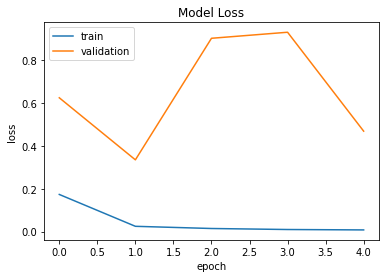

In [17]:
learner.plot('loss')

In [18]:
learner.validate()

242/242 [==============================] - 14s 47ms/step
              precision    recall  f1-score   support

           0       0.56      0.14      0.22       757
           1       0.83      0.98      0.90      4099
           2       0.99      0.93      0.96      2880

    accuracy                           0.88      7736
   macro avg       0.79      0.68      0.69      7736
weighted avg       0.86      0.88      0.85      7736



array([[ 105,  642,   10],
       [  75, 4012,   12],
       [   6,  192, 2682]])

In [19]:
y_pred = predictor.predict(X_test)

NameError: ignored